In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
notas = pd.read_csv('ratings.csv')

In [3]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.shape

(100836, 4)

In [5]:
notas.columns = ['usuario_id', 'filme_id', 'nota', 'momento']
notas.head()

,usuario_id,filme_id,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Analisando as notas em geral

In [6]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [8]:
print("Mediana: ", notas['nota'].median())
print("Média: ", notas['nota'].mean())

Mediana:  3.5
Média:  3.501556983616962


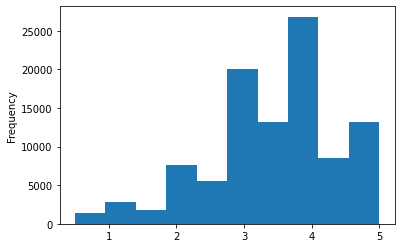

In [9]:
notas.nota.plot(kind='hist')

In [10]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


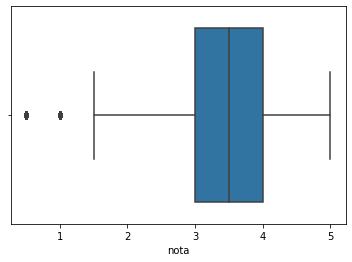

In [11]:
sns.boxplot(notas.nota)

#Olhando os filmes

In [12]:
filmes = pd.read_csv('movies.csv')

In [13]:
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando algumas notas específicas


In [14]:
notas.query('filme_id==1').nota.mean()

3.9209302325581397

In [15]:
notas_medias = notas.groupby('filme_id').mean()['nota']
notas_medias.head()

filme_id
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

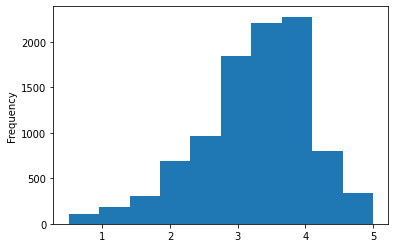

In [16]:
notas_medias.plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


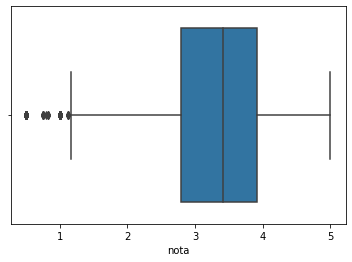

In [17]:
sns.boxplot(notas_medias)

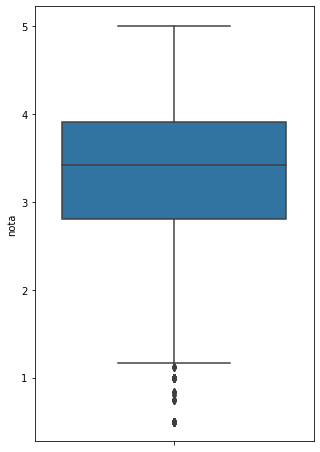

In [18]:
plt.figure(figsize=(5,8))
sns.boxplot(y = notas_medias)

In [19]:
notas_medias.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


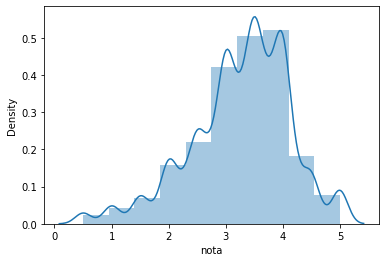

In [20]:
sns.distplot(notas_medias, bins=10)

Text(0.5, 1.0, 'Histograma de médias por filmes')

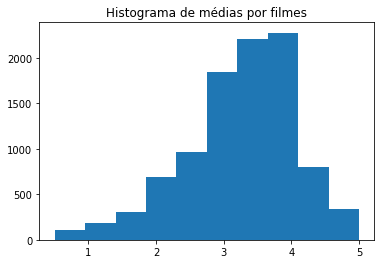

In [21]:
plt.hist(notas_medias)
plt.title('Histograma de médias por filmes')

#Analisando tmdb 5000

In [22]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [23]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [24]:
tmdb["original_language"].value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
ro       2
ta       2
ar       2
id       2
cs       2
af       1
tr       1
te       1
nb       1
sl       1
el       1
hu       1
ps       1
pl       1
xx       1
no       1
is       1
ky       1
vi       1
Name: original_language, dtype: int64

In [25]:
 tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'fa', 'nl', 'th', 'he', 'ro', 'ta', 'ar', 'id', 'cs', 'af',
       'tr', 'te', 'nb', 'sl', 'el', 'hu', 'ps', 'pl', 'xx', 'no', 'is', 'ky',
       'vi'],
      dtype='object')

In [26]:
 tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'fa', 'nl', 'th', 'he', 'ro', 'ta', 'ar', 'id', 'cs', 'af',
       'tr', 'te', 'nb', 'sl', 'el', 'hu', 'ps', 'pl', 'xx', 'no', 'is', 'ky',
       'vi'],
      dtype='object')

In [27]:
contagem_linguas = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_linguas.columns = ["original_language", "total"]
contagem_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


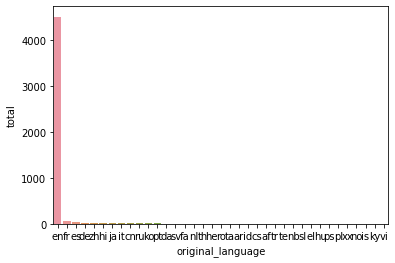

In [28]:
sns.barplot(x="original_language", y="total", data=contagem_linguas)

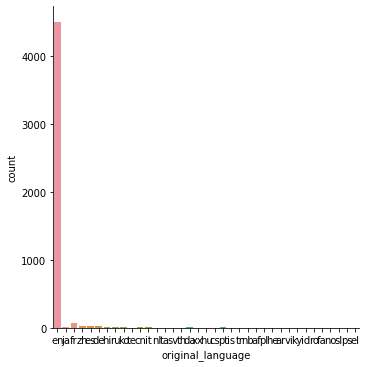

In [29]:
sns.catplot(data=tmdb, x='original_language', kind='count')

([<matplotlib.patches.Wedge at 0x7f3f2420fd10>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

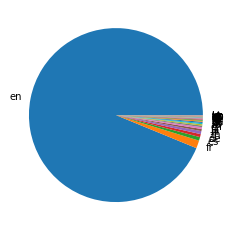

In [30]:
plt.pie(contagem_linguas['total'], labels = contagem_linguas['original_language'])

In [31]:
total_lingua = tmdb["original_language"].value_counts()
total_geral = total_lingua.sum()
total_ingles = total_lingua.loc['en']
total_resto = total_geral - total_ingles
print(total_ingles, total_resto)

4505 298


In [32]:
dados = {
    'lingua': ['Ingles', 'outros'],
    'total': [total_ingles, total_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,Ingles,4505
1,outros,298


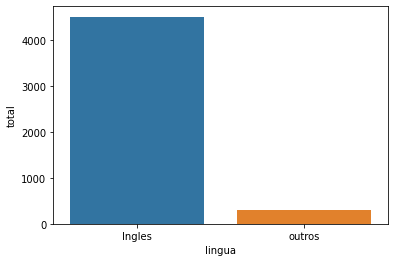

In [33]:
sns.barplot(data=dados, x='lingua', y = 'total')

([<matplotlib.patches.Wedge at 0x7f3f2409e610>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'Ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

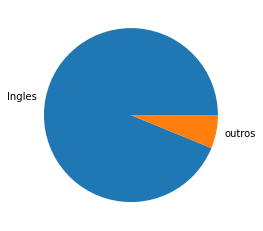

In [34]:
plt.pie(dados['total'], labels=dados['lingua'])

In [35]:
total_lingua_outros = tmdb.query('original_language != "en"').original_language.value_counts()
total_lingua_outros.head()

fr    70
es    32
de    27
zh    27
hi    19
Name: original_language, dtype: int64

In [36]:
total_nao_ingles = tmdb.query('original_language != "en"')

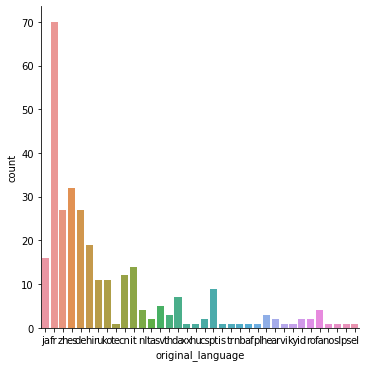

In [37]:
sns.catplot(data=total_nao_ingles, x="original_language",
            kind='count')

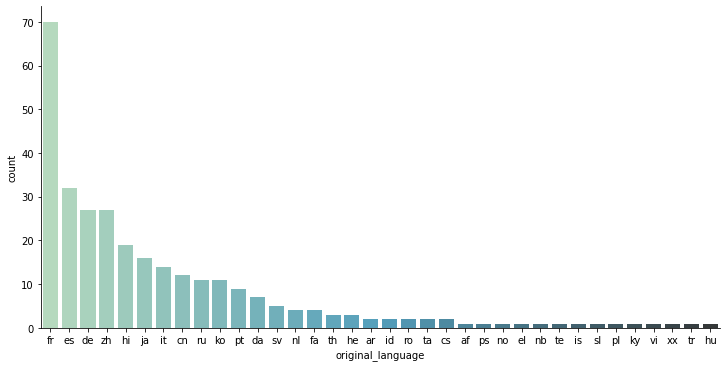

In [38]:
sns.catplot(data=total_nao_ingles, x="original_language",
            kind='count',
            aspect=2,
            palette='GnBu_d',
            order=total_lingua_outros.index)

#Estatísticas

In [39]:
notas.head(2)

,usuario_id,filme_id,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [40]:
notas_filme_1 = notas.query("filme_id == 1")
notas_filme_2 = notas.query("filme_id == 2")
print(len(notas_filme_1), len(notas_filme_2))

215 110


In [41]:
print(f'A média da nota do filme 1 é {notas_filme_1.nota.mean():.2f}')
print(f'A média da nota do filme 2 é {notas_filme_2.nota.mean():.2f}')

A média da nota do filme 1 é 3.92
A média da nota do filme 2 é 3.43


In [42]:
filme_a = np.append(np.array([2.5]*10), np.array([3.5]*10))
filme_b = np.append(np.array([5]*10), np.array([1]*10))

In [43]:
print(filme_a.mean(), filme_b.mean()) 
print(np.median(filme_a), np.median(filme_b))
print(np.std(filme_a), np.std(filme_b))

3.0 3.0
3.0 3.0
0.5 2.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


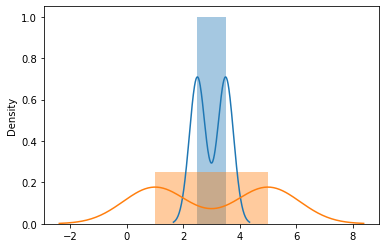

In [44]:
sns.distplot(filme_a)
sns.distplot(filme_b)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

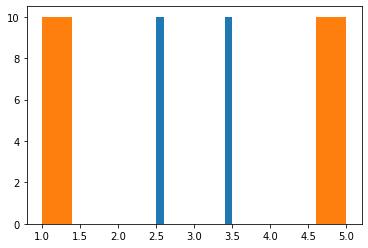

In [45]:
 plt.hist(filme_a)
 plt.hist(filme_b)

{'boxes': [<matplotlib.lines.Line2D at 0x7f3f23ccead0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3f23cd4b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3f23cdabd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3f23cda690>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3f23cd4110>,
  <matplotlib.lines.Line2D at 0x7f3f23ce1bd0>]}

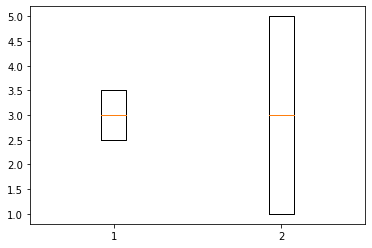

In [46]:
plt.boxplot([filme_a, filme_b])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


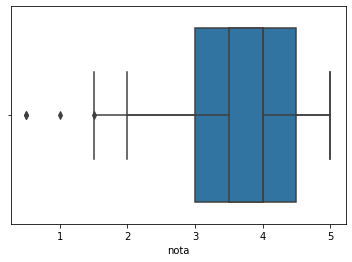

In [47]:
sns.boxplot(notas_filme_1.nota)
sns.boxplot(notas_filme_2.nota)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7f3f23bdce10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3f23be2f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3f23be8f50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3f23be8a10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3f23be2490>,
  <matplotlib.lines.Line2D at 0x7f3f23bf0f50>]}

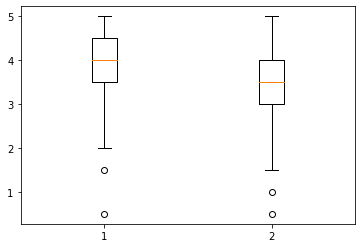

In [48]:
plt.boxplot([notas_filme_1.nota, notas_filme_2.nota])

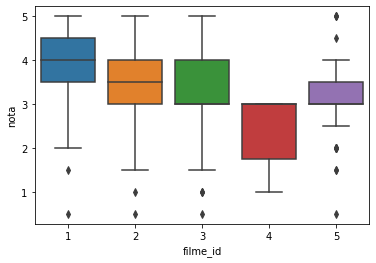

In [49]:
sns.boxplot(x='filme_id', y='nota', data=notas.query('filme_id in [1, 2, 3, 4, 5]'))

In [50]:
print(notas_filme_1.nota.std(), notas_filme_2.nota.std())

0.8348591407114045 0.8817134921476455
